In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
iris = sb.load_dataset("iris")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

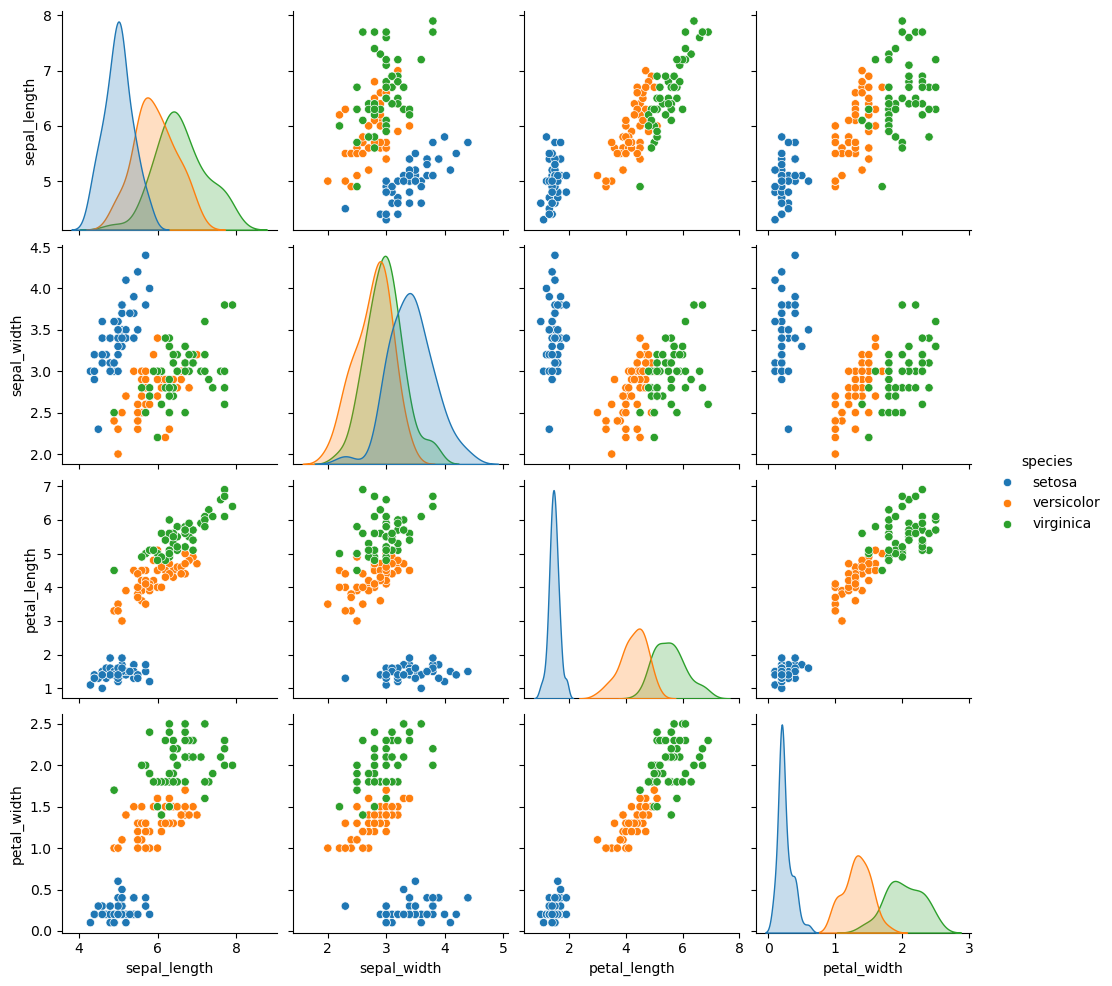

In [9]:
sb.pairplot(iris, hue="species")
plt.show()

In [11]:
#Features
X = iris.drop(columns="species")
#Target
y = iris["species"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

In [23]:
print("Accuracy Comparison:")
print("SVM Classifier Accuracy:", svm_accuracy)
print("KNN Classifier Accuracy:", knn_accuracy)
print("DT Classifier Accuracy:", dt_accuracy)

Accuracy Comparison:
SVM Classifier Accuracy: 0.9777777777777777
KNN Classifier Accuracy: 1.0
DT Classifier Accuracy: 1.0


In [25]:
print("Classification Reports Comparison")
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))
print("_______________________________________")
print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("_______________________________________")
print("DT Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("_______________________________________")

Classification Reports Comparison
SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

_______________________________________
KNN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

_______________________________________
DT Classification Report:
              precision    recall  f1-score 

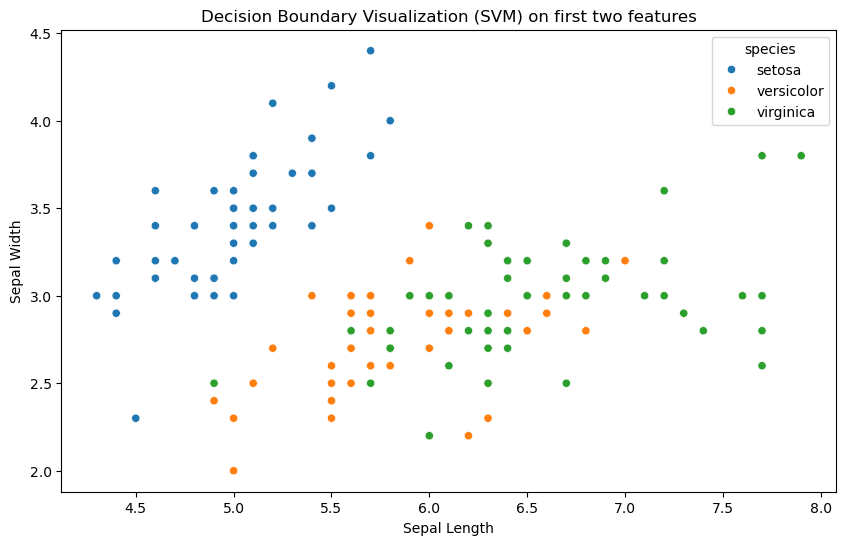

In [31]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data = iris, x="sepal_length", y="sepal_width", hue="species")
plt.title("Decision Boundary Visualization (SVM) on first two features")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

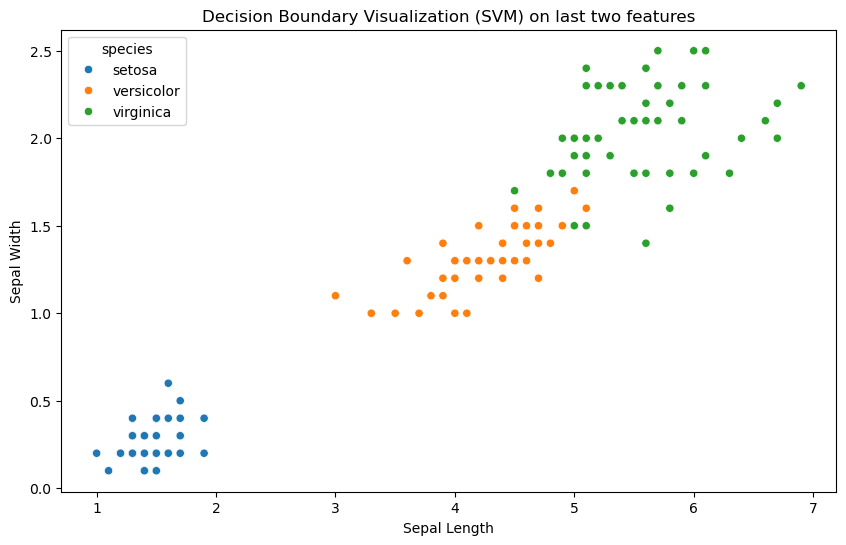

In [33]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data = iris, x="petal_length", y="petal_width", hue="species")
plt.title("Decision Boundary Visualization (SVM) on last two features")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()